In [13]:
'''
1、    鸢尾花数据集：load_iris（）：用于分类任务的数据集。

               2、    手写数字数据集：load_digits（）:用于分类任务或者降维任务的数据集。

               3、    乳腺癌数据集load-barest-cancer（）：简单经典的用于二分类任务的数据集。

               4、    糖尿病数据集：load-diabetes（）：用于回归数据集。

               5、    波士顿房价数据集：load-boston（）：回归任务的数据集。

               6、   体能训练数据集：load-linnerud（）：多变量回归任务的数据集。。
————————————————
版权声明：本文为CSDN博主「正在努力学习」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
'''
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
import pandas as pd
import numpy as np

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:

n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.feature_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:

print(iris.target.shape)
print(iris.target_names)
iris.target

(150,)
['setosa' 'versicolor' 'virginica']


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:

iris_data = pd.DataFrame( iris.data, 
                          columns=iris.feature_names )
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

C:\Users\huang\AppData\Local\Temp\ipykernel_28320\3392783185.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data.head(3).append(iris_data.tail(3))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


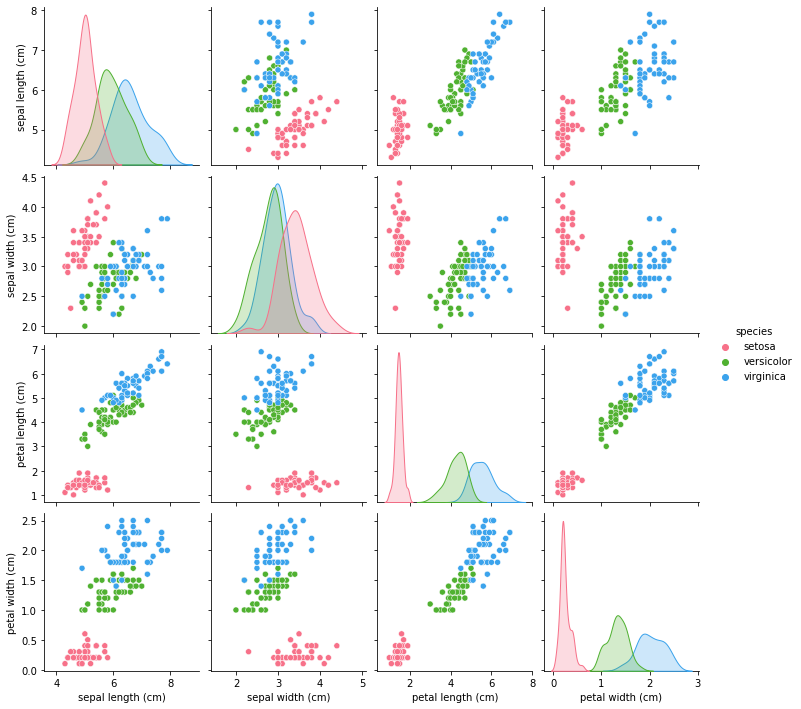

In [11]:
import seaborn as sns
sns.pairplot( iris_data, hue='species', palette='husl' );

In [14]:
# skl_LinearR_v1b.py
# Demo of linear regression by scikit-learn
# v1.0d: 线性回归模型（SKlearn）求解
# Copyright 2021 YouCans, XUPT
# Crated：2021-05-12
 
#  -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
 
 
# 主程序
def main():  # 主程序
    # 读取数据文件
    readPath = "../data/toothpaste.csv"  # 数据文件的地址和文件名
    dfOpenFile = pd.read_csv(readPath, header=0, sep=",")  # 间隔符为逗号，首行为标题行
    dfData = dfOpenFile.dropna()  # 删除含有缺失值的数据
    print(dfData.head())
 
    # Model 1：Y = b0 + b1*X1 + b2*X2 + e
    # 线性回归：分析因变量 Y(sales) 与 自变量 x1(diffrence)、x2(advertise) 的关系
    # 按照模型要求进行数据转换：输入是 array类型的 n*m 矩阵，输出是 array类型的 n*1 数组
    feature_cols = ['difference', 'advertise']  # 创建特征列表
    X = dfData[feature_cols]  # 使用列表选择样本数据的特征子集
    y = dfData['sales']  # 选择样本数据的输出变量
    # print(type(X),type(y))
    # print(X.shape, y.shape)
    # 一元线性回归：最小二乘法(OLS)
    modelRegL = LinearRegression()  # 创建线性回归模型
    modelRegL.fit(X, y)  # 模型训练：数据拟合
    yFit = modelRegL.predict(X)  # 用回归模型来预测输出
    # 输出回归结果 # YouCans, XUPT
    print("\nModel1: Y = b0 + b1*x1 + b2*x2")
    print('回归截距: w0={}'.format(modelRegL.intercept_))  # w0: 截距
    print('回归系数: w1={}'.format(modelRegL.coef_))  # w1,..wm: 回归系数
    # 回归模型的评价指标
    print('R2 确定系数：{:.4f}'.format(modelRegL.score(X, y)))  # R2 判定系数
    print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
    print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
    print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差
 
    # Model 3：Y = b0 + b1*X1 + b2*X2 + b3*X2**2 + e
    # 线性回归：分析因变量 Y(sales) 与 自变量 x1、x2 及 x2平方的关系
    x1 = dfData['difference']  # 价格差，x4 = x1 - x2
    x2 = dfData['advertise']  # 广告费
    x5 = x2**2  # 广告费的二次元
    X = np.column_stack((x1,x2,x5))  # [x1,x2,x2**2]
    # 多元线性回归：最小二乘法(OLS)
    modelRegM = LinearRegression()  # 创建线性回归模型
    modelRegM.fit(X, y)  # 模型训练：数据拟合
    yFit = modelRegM.predict(X)  # 用回归模型来预测输出
    # 输出回归结果 # YouCans, XUPT
    print("\nModel3: Y = b0 + b1*x1 + b2*x2 + b3*x2**2")
    print('回归截距: w0={}'.format(modelRegM.intercept_))  # w0: 截距, YouCans
    print('回归系数: w1={}'.format(modelRegM.coef_))  # w1,..wm: 回归系数, XUPT
    # 回归模型的评价指标
    print('R2 确定系数：{:.4f}'.format(modelRegM.score(X, y)))  # R2 判定系数
    print('均方误差：{:.4f}'.format(mean_squared_error(y, yFit)))  # MSE 均方误差
    print('平均绝对值误差：{:.4f}'.format(mean_absolute_error(y, yFit)))  # MAE 平均绝对误差
    print('中位绝对值误差：{:.4f}'.format(median_absolute_error(y, yFit)))  # 中值绝对误差
    # 计算 F统计量 和 F检验的 P值
    m = X.shape[1]
    n = X.shape[0]
    yMean = np.mean(y)
    SST = sum((y-yMean)**2)  # SST: 总平方和
    SSR = sum((yFit-yMean)**2)  # SSR: 回归平方和
    SSE = sum((y-yFit)**2)  # SSE: 残差平方和
    Fstats = (SSR/m) / (SSE/(n-m-1))  # F 统计量
    probFstats = stats.f.sf(Fstats, m, n-m-1)  # F检验的 P值
    print('F统计量：{:.4f}'.format(Fstats))
    print('FF检验的P值：{:.4e}'.format(probFstats))
    
    # 绘图：原始数据点，拟合曲线
    fig, ax = plt.subplots(figsize=(8, 6))  # YouCans, XUPT
    ax.plot(range(len(y)), y, 'b-.', label='Sample')  # 样本数据
    ax.plot(range(len(y)), yFit, 'r-', label='Fitting')  # 拟合数据
    ax.legend(loc='best')  # 显示图例
    plt.title('Regression analysis with sales of toothpaste by SKlearn')
    plt.xlabel('period')
    plt.ylabel('sales')
    plt.show()
 
    return
 
if __name__ == '__main__':
    main()

FileNotFoundError: [Errno 2] No such file or directory: '../data/toothpaste.csv'